# Vanilla Neural Networks with Keras
* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Recognize the architecture of a vanilla neural network
* Explain how forward and backward propagation contribute to model learning
* Create and evaluate the accuracy of a vanilla neural network
* Design new model architectures to improve performance

### Icons Used in This Notebook
🧠 **Think about**: Things to think about to better your understanding, which we won't necessarily pose to the whole class. <br>
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>

### Sections
1. [Data Pre-Processing](#section1)
2. [Vanilla Neural Networks](#section2)
3. [Training, evaluating, and improving](#section3)

## Installation

If your browser url address is: 

`https://dlab.datahub.berkeley.edu/user/YOURNAME`

Then you are good to go! You are in the dlab's datahub, which already has the packages you need to get started along with 8GB of memory.

If your browser url address is:

`https://colab.research.google.com/github/dlab-berkeley/Python-Deep-Learning/blob/main/lessons/01-Vanilla-Neural-Networks.ipynb`

You are also good to go! You are in Google colab and have access to ~12GB of memory and access to GPUs!

If you want to work locally on your computer, you should have already followed the installation instructions at <https://github.com/dlab-berkeley/Python-Deep-Learning/blob/main/installation-instructions.md> 

If you haven't yet installed keras and tensorflow locally, we highly suggest using the datahub or Google colab.

#### Keras
To build our neural network, we will use a Python-based interface language called `Keras`. `Keras` allows users to easily interact with `TensorFlow`, which is an extensive library containing resources for machine learning and artificial intelligence. 

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
# Note: You may get a warning about CUDA and GPU set up. You can ignore these for now!

2025-03-02 14:02:04.552911: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 14:02:04.555012: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 14:02:04.559396: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 14:02:04.572239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740952924.594163     143 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740952924.60

We also need to import packages to help us with visualizing and manipulating our data. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
import networkx as nx

# Data Pre-processing <a name="section1"></a>


You are a bank called Fells Wargo. Every day, thousands of customers use your banking app to submit checks online. All of the numbers on the check are handwritten. Your app needs to automatically read these handwritten numbers and recognize the right amount to be deposited into each customer account. 

How could you code the solution?

<img src="https://www.usglobalmail.com/wp-content/uploads/2016/12/check-deposits.png" width="600" />

## Reading in the dataset



Before we can think of solutions, we need to understand our data. We will work with the classic MNIST (Modified National Institute of Standards and Technology) dataset, often used to benchmark the performance of image classification models. 

The MNIST dataset consists of 60,000 training and 10,000 test images of handwritten digits. To make computation manageable, we will work with a subset of this dataset. Let's read in our data:

In [3]:
def get_mnist_data(subset=True):
    """
    Returns the MNIST dataset as a tuple:
    (x_train, y_train, x_val, y_val, x_test, y_test)
    
    When subset=TRUE:
    Returns only a subset of the mnist dataset.
    Especially important to use if you are on datahub and only have 1-2GB of memory.
    """
    
    if subset:
        N_TRAIN = 5000
        N_VALIDATION = 1000
        N_TEST = 1000
    else:
        N_TRAIN = 48000
        N_VALIDATION = 12000
        N_TEST = 10000
    
    (x_train_and_val, y_train_and_val), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train_and_val[:N_TRAIN,:,:]
    y_train = y_train_and_val[:N_TRAIN]
    
    x_val = x_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION,:,:]
    y_val = y_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION]
    
    x_test = x_test[:N_TEST]
    y_test = y_test[:N_TEST]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

x_train, y_train, x_val, y_val, x_test, y_test = get_mnist_data(subset=True)

We can print a summary of our data below:

In [4]:
def data_summary(data):
    """
    Takes a list of our data partitions and returns the shape.
    """
    
    for i, data_partition in enumerate(data):
        if i == 0:
            print("Training Data")
        elif i == 2:
            print()
            print("Validation Data")
        elif i == 4:
            print()
            print("Testing Data")

        print(f"Shape: {data_partition.shape}")

data_summary([x_train, y_train, x_val, y_val, x_test, y_test])

Training Data
Shape: (5000, 28, 28)
Shape: (5000,)

Validation Data
Shape: (1000, 28, 28)
Shape: (1000,)

Testing Data
Shape: (1000, 28, 28)
Shape: (1000,)


🔔 **Question:** 

* What do the numbers listed in `Shape: (5000, 28, 28)` refer to?

You can print a sample of MNIST images below to help you visualize the dataset:

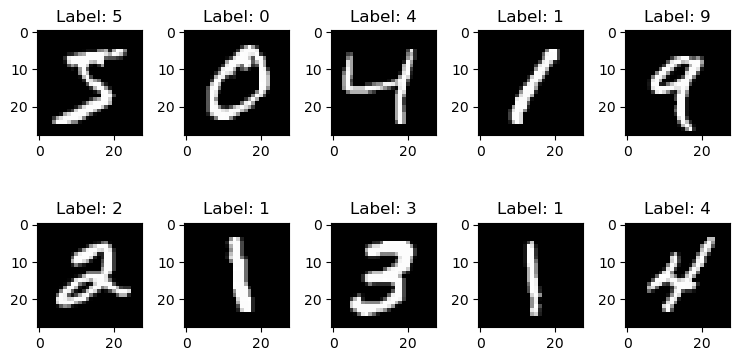

In [5]:
#Thanks to https://github.com/MrDataScience/tutorials/blob/master/Data/MNIST/How%20To%20Plot%20MNIST%20Digits%20Using%20Matplotlib.ipynb 

#How many images to show?
n = 10

#Images are taken from the x-axis of the training data, from start to n
images = x_train[:n]

#Image labels are taken from the y-axis of the training data, from start to n
labels = y_train[:n]

#How do you want to arrange the rows and columns? Make sure they multiply to n!
rows = 2
cols = 5

# plot images
fig, axes = plt.subplots(rows, cols, figsize=(1.5*cols,2*rows))
for i in range(n):
    ax = axes[i//cols, i%cols]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# Before neural networks

Before neural networks, a common way to classify data was (and in many cases, still is) **linear regression**. 

You probably remember this equation from high school algebra (or from the D-Lab's Python Machine Learning workshop):

$$y=mx+b$$

In this equation, we are trying to predict a response variable $y$ based on an explanatory variable $x$. We also include a slope (or **weight**) $m$, which represents important we think the explanatory variable $x$ is in predicting the outcome $y$. 

We can rewrite this equation to handle multiple explanatory variables like this, where $\hat y$ indicates our prediction:

$$\hat y = w_0X_0 + w_1X_1 + ... + w_nX_n + b$$

Notice that we have replaced the slope term $m$ with the weight term $w_n$ (the difference is mostly terminological), and that $X_n$ is in uppercase, showing that it is a matrix containing a variable measurement for each point in the dataset.

In [6]:
# Play around with the equation below!
def plot_line(m, b):
    # Create an array of x values
    x = np.linspace(-10, 10, 400)
    
    # Calculate y values using the equation y = mx + b
    y = m * x + b
    
    # Clear the previous plot
    plt.clf()
    
    # Plot the line
    plt.plot(x, y, label=f'y = {m}x + {b}')
    plt.axhline(0, color='black',linewidth=1)  # x-axis
    plt.axvline(0, color='black',linewidth=1)  # y-axis
    
    # Labels and title
    plt.title('Graph of y = mx + b')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Display the grid
    plt.grid(True)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Create sliders for m and b
m_slider = widgets.FloatSlider(value=2.0, min=-10.0, max=10.0, step=0.1, description='Slope (m):')
b_slider = widgets.FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description='Intercept (b):')

# Use the interactive function to link the sliders to the plot function
interactive_plot = widgets.interactive(plot_line, m=m_slider, b=b_slider)

# Display the interactive widget
display(interactive_plot)


interactive(children=(FloatSlider(value=2.0, description='Slope (m):', max=10.0, min=-10.0), FloatSlider(value…

## 🥊 Challenge 1: Applying regression to MNIST

Think about our MNIST dataset.

1. What values are stored in `x_train`, `x_val`, and `x_test`?
2. What values are stored in `y_train`, `y_val`, and `y_test`?
3. How would you write a linear regression equation to predict the number written for each image?

### The limitations of regression

If you found the above challenge hard, you are not alone! 

As the name suggests, this type of regression works best when the relationship between the explanatory and response variable(s) is **linear**. But it isn't exactly clear that our MNIST problem works this way!

If each pixel's row and column was an explanatory variable, we could try to write an equation like this:

$$\hat y = w_{row}X_{row} + w_{column}X_{column} + b$$

But does this model make sense? After all, a number doesn't become more '7-like' the more to the right or to the left it is in the image!

This is the central problem with linear regression: as the name suggests, it can't capture relationships that are **non-linear**. 

# Vanilla neural networks <a name="section2"></a>


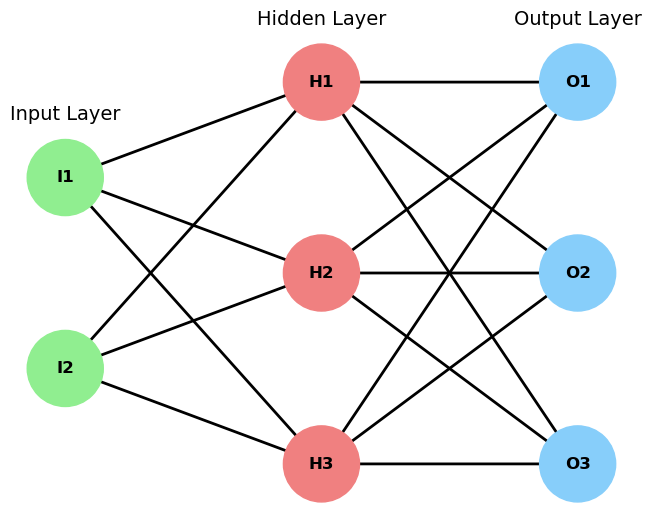

In [32]:
def plot_neural_network():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    input_layer = ['I1','I2']  # Input layer with 2 neurons
    hidden_layer = ['H1', 'H2', 'H3']  # Hidden layer with 3 neurons
    output_layer = ['O1','O2','O3']  # Output layer with 3 neurons

    # Add nodes to the graph for each layer
    G.add_nodes_from(input_layer)
    G.add_nodes_from(hidden_layer)
    G.add_nodes_from(output_layer)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in input_layer:
        for h in hidden_layer:
            G.add_edge(i, h)

    # From hidden layer to output layer
    for h in hidden_layer:
        for o in output_layer:
            G.add_edge(h, o)

    # Define the positions of the nodes for visualizing the layers
    pos = {
        'I1': (0, 0.5), 'I2': (0,-0.5),  # Position for input neuron
        'H1': (1, 1), 'H2': (1, 0), 'H3': (1, -1),  # Hidden layer neurons
        'O1': (2, 1),'O2':(2,0), 'O3':(2,-1)  # Position for output neuron
    }

    # Define colors for each layer
    layer_colors = {
        'I1': 'lightgreen', 'I2': 'lightgreen', # Input layer color
        'H1': 'lightcoral', 'H2': 'lightcoral', 'H3': 'lightcoral',  # Hidden layer color
        'O1': 'lightskyblue', 'O2': 'lightskyblue', 'O3': 'lightskyblue'  # Output layer color
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 0.8, 'Input Layer', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Hidden Layer', fontsize=14, ha='center')
    plt.text(2, 1.3, 'Output Layer', fontsize=14, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

plot_neural_network()

A basic (or vanilla) neural network is made up of three layers that information travels through. These are the:

1) **input** layer
2) **hidden** layer(s)
3) **output** layer

This model is a type of **feedforward network** (FFN), meaning information passes sequentially from one layer of the model to another.

## The input layer

The first layer of a neural network is called the **input layer**. The input layer doesn't perform any computation; instead, it takes in data from our data source and passes it in the appropriate form to the next layer.

The input layer is made up of nodes, one for each feature (explanatory variable) from the dataset. Note that this is not the same as how many examples are in the dataset.

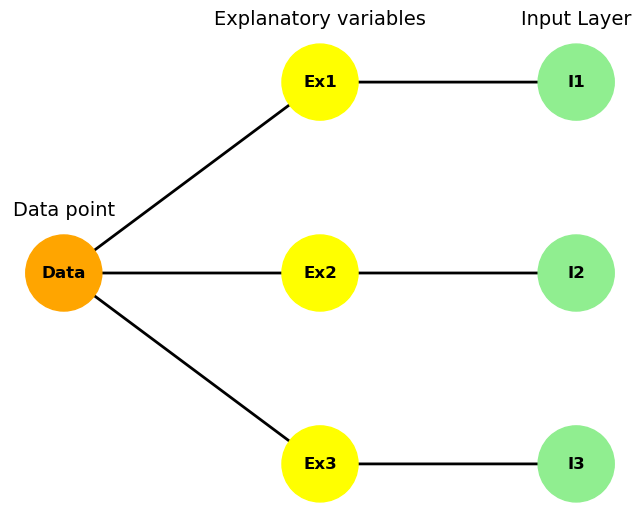

In [8]:
def plot_neural_network():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    data_layer = ['Data']  # Input layer with 2 neurons
    feature_layer = ['Ex1', 'Ex2', 'Ex3']  # Hidden layer with 3 neurons
    input_layer = ['I1','I2','I3']  # Output layer with 3 neurons

    # Add nodes to the graph for each layer
    G.add_nodes_from(data_layer)
    G.add_nodes_from(feature_layer)
    G.add_nodes_from(input_layer)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in data_layer:
        for h in feature_layer:
            G.add_edge(i, h)

    G.add_edge('Ex1','I1')
    G.add_edge('Ex2','I2')
    G.add_edge('Ex3','I3')

    # Define the positions of the nodes for visualizing the layers
    pos = {
        'Data': (0, 0), # Position for input neuron
        'Ex1': (1, 1), 'Ex2': (1, 0), 'Ex3': (1, -1),  # Hidden layer neurons
        'I1': (2, 1),'I2':(2,0), 'I3':(2,-1)  # Position for output neuron
    }

    # Define colors for each layer
    layer_colors = {
        'Data': 'orange', # Input layer color
        'Ex1': 'yellow', 'Ex2': 'yellow', 'Ex3': 'yellow',  # Hidden layer color
        'I1': 'lightgreen', 'I2': 'lightgreen', 'I3': 'lightgreen'  # Output layer color
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 0.3, 'Data point', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Explanatory variables', fontsize=14, ha='center')
    plt.text(2, 1.3, 'Input Layer', fontsize=14, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

# Call the function to plot the neural network
plot_neural_network()

Let's look at an image from our dataset. Notice that there are no colored pixels: that is, the image is in *grayscale*.

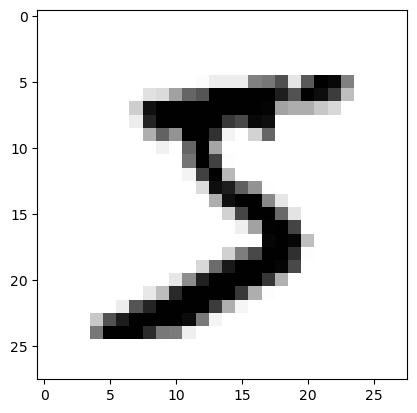

In [35]:
plt.imshow(x_train[0, :, :], cmap=plt.cm.binary);

Here's how this image is stored in our dataset:

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

🔔 **Question:** 
 
* What do you think each value represents in `x_train[0]`? How does it relate to grayscale?

For our MNIST model, each pixel in a single image is a unique feature. So our input layer is 28x28 pixels = 784 features.
$$input = X_1...X_{784}$$

In `Keras`, we instantiate our model using `Sequential()`. `Sequential` means that this model is a **feedforward network**. 

In [10]:
first_network = Sequential()

`Sequential()` models do not define an input layer. Instead, the input layer's shape is implied based on what we tell the following layer to expect as input.

## The hidden layer(s)

Our data now travels to the **hidden layer**. There may be many hidden layers in single model. It looks like this:

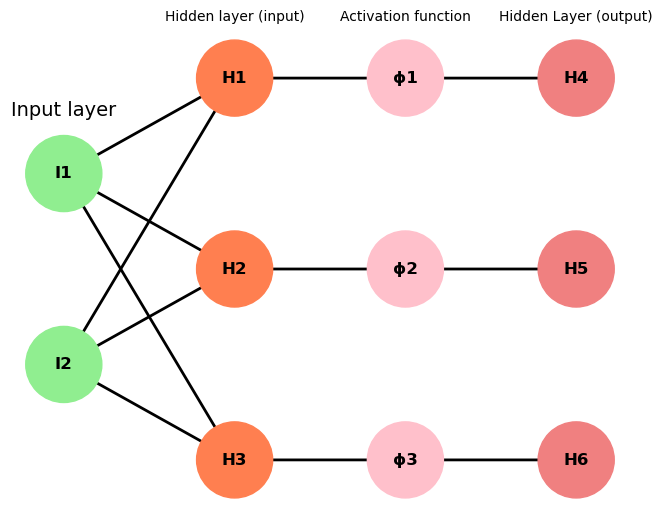

In [11]:
def plot_hidden():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    input_layer = ['I1','I2']  # Input layer with 2 neurons
    hidden_input = ['H1', 'H2', 'H3']  # Hidden input layer with 3 neurons
    activation_layer = ['ϕ1','ϕ2','ϕ3']  # activation layer with 3 neurons
    hidden_out=['H4','H5','H6']

    # Add nodes to the graph for each layer
    G.add_nodes_from(input_layer)
    G.add_nodes_from(hidden_input)
    G.add_nodes_from(activation_layer)
    G.add_nodes_from(hidden_out)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in input_layer:
        for h in hidden_input:
            G.add_edge(i, h)

    G.add_edge('H1','ϕ1')
    G.add_edge('H2','ϕ2')
    G.add_edge('H3','ϕ3')

    G.add_edge('ϕ1','H4')
    G.add_edge('ϕ2','H5')
    G.add_edge('ϕ3','H6')

    # Define the positions of the nodes for visualizing the layers
    pos = {
        'I1': (0, 0.5), 'I2':(0,-0.5), # Position for input neuron
        'H1': (1, 1), 'H2': (1, 0), 'H3': (1, -1),  # Hidden layer neurons
        'ϕ1': (2, 1),'ϕ2':(2,0), 'ϕ3':(2,-1),  # Position for output neuron
        'H4':(3,1), 'H5':(3,0),'H6':(3,-1)
    }

    # Define colors for each layer
    layer_colors = {
        'I1': 'lightgreen', 'I2': 'lightgreen', # Input layer color
        'H1': 'coral', 'H2': 'coral', 'H3': 'coral',  # Hidden layer color
        'ϕ1': 'pink', 'ϕ2': 'pink', 'ϕ3': 'pink',  # Output layer color
        'H4':'lightcoral', 'H5':'lightcoral','H6':'lightcoral'
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 0.8, 'Input layer', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Hidden layer (input)', fontsize=10, ha='center')
    plt.text(2, 1.3, 'Activation function', fontsize=10, ha='center')
    plt.text(3, 1.3, 'Hidden Layer (output)', fontsize=10, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

# Call the function to plot the neural network
plot_hidden()

Models learn to recognize complex patterns by learning smaller sub-patterns first. For numbers, these sub-patterns might be things like lines or loops. 

We can imagine that each component of our hidden layer wants to find a small pattern within the input image. When these small patterns are combined, they help the model uniquely identify each number.

Let's say our model is trying to classify the image below, `x_train[31]`. Imagine the goal of part of our hidden layer is to identify vertical lines, like we would see in 1, 4, or maybe 9.

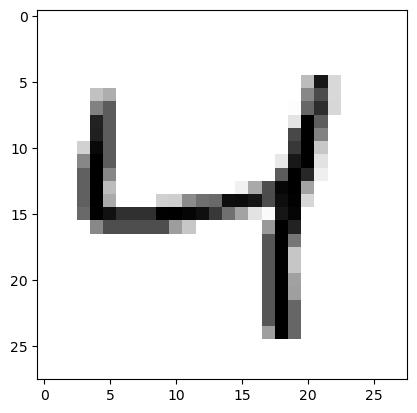

In [12]:
plt.imshow(x_train[2], cmap=plt.cm.binary);

🧠 **Think about:** 

One of the jobs of the hidden layer is extracting sub-patterns, or *features*, from the data. 
 
1) How can you as a human tell where there are vertical lines in this image?
2) How would you tell a computer model where to find vertical lines in this image?

Once the model has found criteria for identifying a sub-pattern, we want to weight the pixels in our image based on how well they match the pattern we're looking for.

Maybe we could do this by weighting each pixel according to some "vertical line" criteria, with a linear equation:

$$hidden = WX + b$$

However, we still have the same problem as before: line identification is a non-linear problem. To solve this, our model needs to be non-linear also. 

### Capturing non-linearity

The core of a neural network is the artificial **neuron**. Their behavior is modeled after human neurons. The amount a human neuron is stimulated and the amount it fires isn't linearly related: they don't 30% fire if they are 30% stimulated. Instead, they fully fire after they are stimulated past a certain point.

Because this relationship isn't linear, human neurons can learn patterns that aren't linear either. We can mimic this property in artificial neurons by using an **activation function**, which filters the output of our hidden layer based on certain criteria.

The most common activation function is the **ReLU** (Rectified Linear Unit). The ReLU function only passes a neuron's value through to the next layer if it is positive; non-positive values are passed through as 0. 

$$ReLU(x) = max(0,x)$$

Now, our hidden layer looks like this:

$$hidden = RELU(WX + b)$$

Play around with the interactive graph below to see how ReLU works! 

In [13]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Function to plot ReLU
def plot_relu(input_value):
    # Generate an array of inputs for the x-axis
    x = np.linspace(-10, 10, 400)
    y = relu(x)
    
    # Plot the ReLU function
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="ReLU(x)", color="blue")
    
    # Mark the point for the selected input value
    plt.plot(input_value, relu(input_value), 'ro')  # red dot for input_value
    plt.text(input_value, relu(input_value), f'({input_value:.2f}, {relu(input_value):.2f})', fontsize=12, color='red', ha='right')

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.title("ReLU Activation Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Output (ReLU(x))")
    plt.grid(True)
    plt.legend()
    plt.show()

# Create a slider for input value
input_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='Input value:', continuous_update=False)

# Use interactive to call the plot_relu function with the slider value
interactive_plot = interactive(plot_relu, input_value=input_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Input value:', max=10.0, mi…

In `Keras`, we can create a hidden layer like this:

In [37]:
first_network.add(Dense(units = 64,
                        activation= "relu",
                        input_shape=(28*28,)))

The `Keras` `Dense` layer is another word for a **fully-connected layer**, meaning every neuron in one layer is connected to every neuron in the next. 

🔔 **Question:** 

1) Why do you think there so fewer neurons in the hidden layer compared to the input layer? What purpose could this serve?

## The output layer

Once the hidden layer's calculations are done, its values are passed on to the **output layer**. The output layer predicts the category of our handwritten number, out of the possible numbers 0-9. As there are ten possible outcomes, the output layer has ten neurons. 

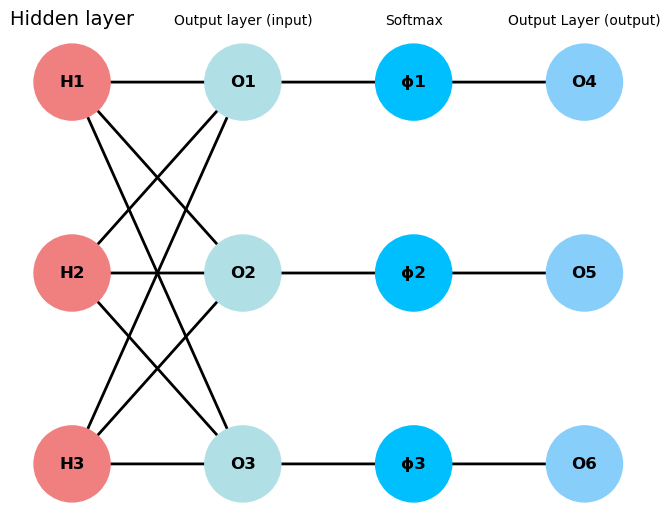

In [15]:
def plot_hidden():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    input_layer = ['H1','H2','H3']  # Input layer with 2 neurons
    hidden_input = ['O1', 'O2', 'O3']  # Hidden input layer with 3 neurons
    activation_layer = ['ϕ1','ϕ2','ϕ3']  # activation layer with 3 neurons
    hidden_out=['O4','O5','O6']

    # Add nodes to the graph for each layer
    G.add_nodes_from(input_layer)
    G.add_nodes_from(hidden_input)
    G.add_nodes_from(activation_layer)
    G.add_nodes_from(hidden_out)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in input_layer:
        for h in hidden_input:
            G.add_edge(i, h)

    G.add_edge('O1','ϕ1')
    G.add_edge('O2','ϕ2')
    G.add_edge('O3','ϕ3')

    G.add_edge('ϕ1','O4')
    G.add_edge('ϕ2','O5')
    G.add_edge('ϕ3','O6')

    # Define the positions of the nodes for visualizing the layers
    pos = {
        'H1': (0, 1), 'H2':(0,0), 'H3':(0,-1), # Position for input neuron
        'O1': (1, 1), 'O2': (1, 0), 'O3': (1, -1),  # Hidden layer neurons
        'ϕ1': (2, 1),'ϕ2':(2,0), 'ϕ3':(2,-1),  # Position for output neuron
        'O4':(3,1), 'O5':(3,0),'O6':(3,-1)
    }

    # Define colors for each layer
    layer_colors = {
        'H1': 'lightcoral', 'H2': 'lightcoral','H3': 'lightcoral', # Input layer color
        'O1': 'PowderBlue', 'O2': 'PowderBlue', 'O3': 'PowderBlue',  # Hidden layer color
        'ϕ1': 'DeepSkyBlue', 'ϕ2': 'DeepSkyBlue', 'ϕ3': 'DeepSkyBlue',  # Output layer color
        'O4':'lightskyblue', 'O5':'lightskyblue','O6':'lightskyblue'
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 1.3, 'Hidden layer', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Output layer (input)', fontsize=10, ha='center')
    plt.text(2, 1.3, 'Softmax', fontsize=10, ha='center')
    plt.text(3, 1.3, 'Output Layer (output)', fontsize=10, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

# Call the function to plot the neural network
plot_hidden()

We initiate our output layer like this:

In [16]:
first_network.add(Dense(units = 10,
                        activation = "softmax"))

### The softmax

You might have noticed that we never explicitly called this layer an output layer. Rather, this is implied by our choice of `softmax` for the activation function. 

The softmax transforms the output layer's calculations into a set of probabilities that are all positive and sum to 1.  The neuron with the highest probability is chosen as the predicted category for the image. 

The softmax can be represented like this:

$$ \hat y = \frac{exp(x_i)}{\sum_j exp(x_j)} $$

The widget below shows how the softmax changes raw logits into softmaxed probabilities. You can play around with it by giving it a list of decimal values. 

In [17]:
# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # To prevent overflow
    return exp_x / np.sum(exp_x)

# Function to plot Softmax
def plot_softmax(input_values):
    # Convert the input values (comma-separated string) to a numpy array
    x = np.array([float(i) for i in input_values.split(',')])
    
    # Compute softmax values
    y = softmax(x)
    
    # Plot the Softmax output
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(y)), y, color='skyblue')
    plt.xticks(range(len(y)), [f'Num {i+1}' for i in range(len(y))])
    plt.title("Softmax Activation Function Output")
    plt.xlabel("Number")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    
    # Display probabilities next to the bars
    for i, v in enumerate(y):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
    
    plt.show()

# Create a text box to input comma-separated values
input_text = widgets.Text(
    value="1.0, 2.0, 3.0",
    description='Input Values:',
    disabled=False
)

# Create the interactive plot
interactive_plot = interactive(plot_softmax, input_values=input_text)
display(interactive_plot)

interactive(children=(Text(value='1.0, 2.0, 3.0', description='Input Values:'), Output()), _dom_classes=('widg…

## The model so far

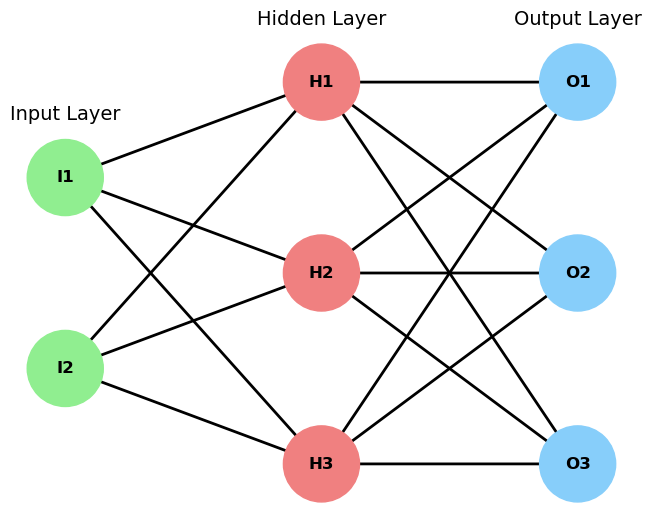

In [38]:
def plot_neural_network():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    input_layer = ['I1','I2']  # Input layer with 2 neurons
    hidden_layer = ['H1', 'H2', 'H3']  # Hidden layer with 3 neurons
    output_layer = ['O1','O2','O3']  # Output layer with 3 neurons

    # Add nodes to the graph for each layer
    G.add_nodes_from(input_layer)
    G.add_nodes_from(hidden_layer)
    G.add_nodes_from(output_layer)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in input_layer:
        for h in hidden_layer:
            G.add_edge(i, h)

    # From hidden layer to output layer
    for h in hidden_layer:
        for o in output_layer:
            G.add_edge(h, o)

    # Define the positions of the nodes for visualizing the layers
    pos = {
        'I1': (0, 0.5), 'I2': (0,-0.5),  # Position for input neuron
        'H1': (1, 1), 'H2': (1, 0), 'H3': (1, -1),  # Hidden layer neurons
        'O1': (2, 1),'O2':(2,0), 'O3':(2,-1)  # Position for output neuron
    }

    # Define colors for each layer
    layer_colors = {
        'I1': 'lightgreen', 'I2': 'lightgreen', # Input layer color
        'H1': 'lightcoral', 'H2': 'lightcoral', 'H3': 'lightcoral',  # Hidden layer color
        'O1': 'lightskyblue', 'O2': 'lightskyblue', 'O3': 'lightskyblue'  # Output layer color
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 0.8, 'Input Layer', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Hidden Layer', fontsize=14, ha='center')
    plt.text(2, 1.3, 'Output Layer', fontsize=14, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

plot_neural_network()

So far, we've created a model with three layers. 

1. Our `input layer` maps each feature in our dataset to a node. In our model, each pixel is a feature, so there are 28*28 = 784 nodes.

   $$input = X_{784}$$
   

3. Our `hidden layer` $H$ takes in the output from the input layer $X$ and weights the output according to some criteria (usually how well parts of the image match a sub-pattern). We filter the results through an activation function $\phi$, which adds non-linearity.

   $$hidden = \phi(WX+b)$$

5. Our `output layer` $O$ has one neuron for each possible classification. It takes the output of the hidden layer and filters its results through a softmax function, which assigns normalized probabilities for each of the possible classifications. The neuron with the highest probability is the model's predicted classification for the image.

   $$ output = softmax(HW + b) $$

## Loss

We have successfully made a model that classifies images! But how do we know if the model is right? And how do we improve its accuracy?

We can measure the accuracy of a model by comparing its predictions for each data point to the true classification of that data point. This describes the model's error --also called its **loss**-- and the metric we use to measure this error is called the **loss function**.

The basic intuition for loss is shown in the image below. We will discuss more specific functions in a moment. 

<img src="https://ja.d2l.ai/_images/linearregression.svg" width="400" />

In `Keras`, we can give our model ways to evaluate its accuracy using the `compile()` function.

In [18]:
first_network.compile(optimizer = 'rmsprop', 
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

For this model, we have chosen `categorical cross-entropy` as our loss function. This is a common choice for classification problems involving multiple possible outcomes. 

The basic intuition is that a model makes predictions based on what it *thinks* is true about the real world, not what is *actually* true (also called the *ground truth*). We can imagine the model's best guess and the ground truth as two different probability distributions. When the best guess and ground truth totally overlap, the difference between the probability distributions is 0, and the model is 100% accurate. 
    
**Cross-entropy** refers to this descrepancy. More specifically, categorical cross-entropy refers to the amount of information needed to encode a random variable when it is represented through the true distribution versus the estimated one. 

Categorical cross-entropy $H(y_j,\hat y_j)$ can be represented below, where $y$ is the true probability, $\hat y$ is the estimated probability, and $N$ is the number of data points.

$$H(y_j,\hat y_j) = -\sum_{j=1}^N y_j log (\hat y_j)$$

The interactive graph below shows the cross-entropy loss when the true class of a datapoint is either 0 or 1. Play around with the slider to see the relationship between the model's predicted probability(clarify), loss, and cross-entropy loss.

In [19]:
# Cross-Entropy Loss function
def cross_entropy_loss(true_class, predicted_prob):
    # Clip predicted_prob to avoid log(0) errors
    predicted_prob = np.clip(predicted_prob, 1e-10, 1 - 1e-10)
    return -true_class * np.log(predicted_prob) - (1 - true_class) * np.log(1 - predicted_prob)

# Function to plot Cross-Entropy Loss
def plot_cross_entropy_loss(true_class, predicted_prob):
    # Compute the cross-entropy loss
    loss = cross_entropy_loss(true_class, predicted_prob)
    
    # Plot the Cross-Entropy Loss
    plt.figure(figsize=(8, 6))
    x_vals = np.linspace(0.01, 0.99, 100)  # to avoid log(0)
    y_vals = cross_entropy_loss(true_class, x_vals)
    
    plt.plot(x_vals, y_vals, label=f'Cross-Entropy Loss (True Class: {int(true_class)})', color='blue')
    plt.scatter(predicted_prob, loss, color='red', zorder=5)  # Mark the current point
    plt.text(predicted_prob, loss + 0.1, f'{loss:.2f}', ha='center', fontsize=12, color='red')

    plt.title("Cross-Entropy Loss Function")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.ylim(0, 5)  # limit y-axis for better visibility
    plt.show()

# Create sliders for interactive input
true_class_slider = widgets.ToggleButtons(
    options=[(f"Class {i}", i) for i in range(1)],
    description='True Class:',
    disabled=False
)

predicted_prob_slider = widgets.FloatSlider(
    value=0.5, min=0.01, max=0.99, step=0.01,
    description='Predicted Probability:',
    disabled=False
)

# Use interactive to update the plot
interactive_plot = interactive(plot_cross_entropy_loss, true_class=true_class_slider, predicted_prob=predicted_prob_slider)
display(interactive_plot)

interactive(children=(ToggleButtons(description='True Class:', options=(('Class 0', 0),), value=0), FloatSlide…

While the loss function tells the model how to *measure* loss, the **optimizer** tells the model how to update its parameters to *improve* the loss. Our model uses **Root Mean Square Propagation**, also called `rmsprop`. It is beyond the scope of this workshop to discuss rmsprop in detail, but interested D-Labbers [can check out this introduction](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a).

## Backpropagation

During **forward propagation**, information flows through a graph from the input, hidden, to the output layers, where the model makes a prediction. Because we know what the true classification each image in our dataset is, we can compare the model's prediction with each image's true value and calculate the discrepancy between the two. This discrepancy is the model's error or loss.

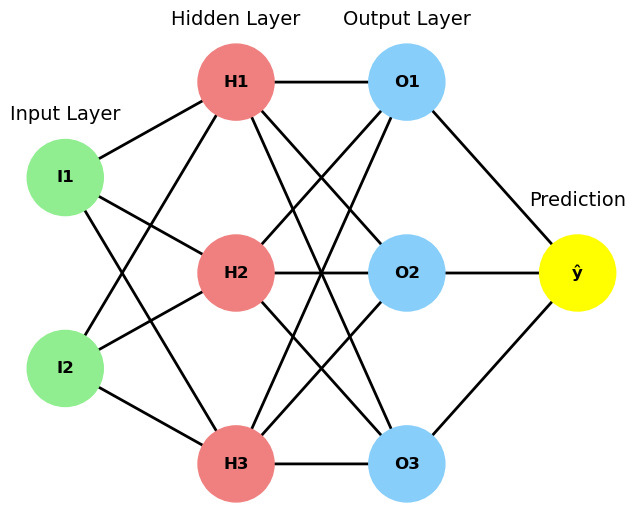

In [20]:
def plot_forward():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    input_layer = ['I1','I2']  # Input layer with 2 neurons
    hidden_layer = ['H1', 'H2', 'H3']  # Hidden layer with 3 neurons
    output_layer = ['O1','O2','O3']  # Output layer with 3 neurons
    pred = ['ŷ']

    # Add nodes to the graph for each layer
    G.add_nodes_from(input_layer)
    G.add_nodes_from(hidden_layer)
    G.add_nodes_from(output_layer)
    G.add_nodes_from(pred)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in input_layer:
        for h in hidden_layer:
            G.add_edge(i, h)

    # From hidden layer to output layer
    for h in hidden_layer:
        for o in output_layer:
            G.add_edge(h, o)

    for o in output_layer:
        for p in pred:
            G.add_edge(o, p)


    # Define the positions of the nodes for visualizing the layers
    pos = {
        'I1': (0, 0.5), 'I2': (0,-0.5),  # Position for input neuron
        'H1': (1, 1), 'H2': (1, 0), 'H3': (1, -1),  # Hidden layer neurons
        'O1': (2, 1),'O2':(2,0), 'O3':(2,-1), # Position for output neuron
        'ŷ': (3,0)
    }

    # Define colors for each layer
    layer_colors = {
        'I1': 'lightgreen', 'I2': 'lightgreen', # Input layer color
        'H1': 'lightcoral', 'H2': 'lightcoral', 'H3': 'lightcoral',  # Hidden layer color
        'O1': 'lightskyblue', 'O2': 'lightskyblue', 'O3': 'lightskyblue',  # Output layer color
        'ŷ':'yellow'
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 0.8, 'Input Layer', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Hidden Layer', fontsize=14, ha='center')
    plt.text(2, 1.3, 'Output Layer', fontsize=14, ha='center')
    plt.text(3.0, 0.35, 'Prediction', fontsize=14, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

plot_forward()

Once we have a loss value, how does the model actually update its weights to improve performance? 

This is achieved through **backpropagation**. For more details on the process, [be sure to look here.](https://d2l.ai/chapter_multilayer-perceptrons/backprop.html#backpropagation)

In backpropagation, our goal is to update our weights so that the model is more accurate the next time we run it. To do this, we want to know how much each weight contributes to the model's error. This is a **partial derivative** that shows the rate of change of the loss function for each weight individually. 

If we collect all of these partial derivatives into a vector, we get a **gradient** that shows the rate of greatest change of the loss function for the model as a whole. To do this, we must travel backwards through our model, and so this is called backpropagation.

Updating our weight values along the downward direction of this gradient means our values are moving in the direction that makes the error smaller.
This approach is called **gradient descent**. 

To read about how non-RELU activation functions interact with backprop, expand this cell.

Besides ReLU, other common activation functions include the sigmoid and tanh (hyperbolic tangent) functions.

We can represent the sigmoid function as:

<img src="https://d2l.ai/_images/output_mlp_76f463_48_0.svg" width="500" />

And we can represent the tanh function as:

<img src="https://d2l.ai/_images/output_mlp_76f463_78_0.svg" width="500" />

Although sigmoid and tanh functions mimic human neurons more accurately than ReLU, their derivatives can cause trouble for gradient descent. Can you see what might be a problem?

Here is the derivative of the sigmoid function:

<img src="https://d2l.ai/_images/output_mlp_76f463_63_0.svg" width="500" />

And here is the derivative of the tanh function:

<img src="https://d2l.ai/_images/output_mlp_76f463_93_0.svg" width="500" />

Notice that in the derivative of the sigmoid and tanh functions, many values are very close to 0. Because backpropagation involves multiplying many derivatives together (due to the chain rule used to compute them), these values run the risk of becoming incredibly small. They may be so small that the model parameters are updated so insignificantly that learning effectively stops. This is called the vanishing gradient problem (its opposite, the exploding gradient problem, involves multiplying numbers so large that the model breaks).

In contrast, ReLU derivatives are well behaved, as they are either zero or one:

<img src="https://d2l.ai/_images/output_mlp_76f463_33_0.svg" width="500" />

This important property is seen by most machine learning practioners as worth the drop in strict accuracy to human neurons that sigmoid and tanh functions can provide.

### Epochs and batches

In an ideal world, we might have the model make predictions for every point in our dataset before we update the weights. But this is infeasible for large datasets. It is more efficient to break the dataset into smaller pieces called **minibatches**, where the number of data points in the minibatch is the **batch size**. Weights are updated every time the model runs through one minibatch. An **epoch** is a complete pass of the dataset through the model.

Most neural networks use **minibatch gradient descent** for backpropagation.

# Training, evaluating, and improving <a name="section3"></a>

## Training the model

Now that we have a model, it's time to train it. Before we do this, we need to flatten our images from two-dimensional 28*28 pixel arrays to one-dimensional 784 pixel arrays. Traditional neural networks prefer this format.

In [21]:
def transform_data(xdata, ydata):
    """
    Transforms image data:
        1. Flattens pixel dimensions from 2 -> 1
        2. Scales pixel values between [0,1]
    Transforms target data (ydata):
        - Formats targets as one hot encoded columns
    """
    
    x = {}
    for name, partition in zip(["x_train", "x_val", "x_test"],xdata):
        flatten = partition.reshape((partition.shape[0], 28 * 28))
        scaled = flatten.astype('float32') / 255
        x[name] = scaled
    
    y = {}
    for name, partition in zip(["y_train", "y_val", "y_test"],ydata):
        y[name] = to_categorical(partition)
    
    return x['x_train'], y['y_train'], x['x_val'], y['y_val'], x['x_test'], y['y_test']

In [22]:
x_train_trans, y_train_trans, x_val_trans, y_val_trans, x_test_trans, y_test_trans = transform_data([x_train, x_val, x_test],
                                   
                                                                                                    [y_train, y_val, y_test])

In [23]:
data_summary([x_train_trans, y_train_trans, x_val_trans, y_val_trans, x_test_trans, y_test_trans])

Training Data
Shape: (5000, 784)
Shape: (5000, 10)

Validation Data
Shape: (1000, 784)
Shape: (1000, 10)

Testing Data
Shape: (1000, 784)
Shape: (1000, 10)


We can train our model in `Keras` using the `fit()` function. Note how we can specify `epoch` and `batch_size` here.

In [24]:
history = first_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=5, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans), )

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6043 - loss: 1.5086 - val_accuracy: 0.7950 - val_loss: 0.6764
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.5481 - val_accuracy: 0.8830 - val_loss: 0.4299
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9027 - loss: 0.3796 - val_accuracy: 0.8960 - val_loss: 0.3695
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9229 - loss: 0.2989 - val_accuracy: 0.9110 - val_loss: 0.3138
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9291 - loss: 0.2580 - val_accuracy: 0.9050 - val_loss: 0.3187


## Evaluating the model

Let's visualize our model's accuracy, or the percentage of images it correctly classifies:

In [25]:
def plot_epoch_accuracy(history_dict):
    """
    Plots the training and validation accuracy of a neural network.
    """
    
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, color = 'navy', alpha = 0.8, label='Training Accuracy')
    plt.plot(epochs, val_acc, color = 'green', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt.show()

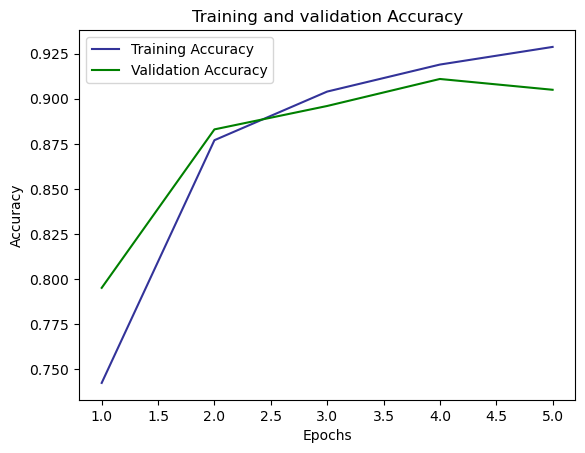

In [26]:
plot_epoch_accuracy(history.history)

Our model is more accurate than chance, but still has a long way to go. The fact that our model performs much worse with validation data suggests that it is still too dependent on the training data-- it isn't *generalizing*.

## Improving the model

Some basic ways we might improve model performance include:
* Adding more neurons to the hidden layer(s)
* Adding more hidden layers
* Training the model for more epochs

🧠 **Think about:**
* Why might doing these things improve model performance?

## 🥊 Challenge 2: Improving our model

Commented below is the network we've made, from creation to training:

In [1]:
# first_network = Sequential()
# first_network.add(Dense(units = 64,
#                         activation= "relu",
#                         input_shape=(28*28,)))
# first_network.add(Dense(units = 10,
#                         activation = "softmax"))
# first_network.compile(optimizer = 'rmsprop', 
#                      loss = 'categorical_crossentropy',
#                      metrics = ['accuracy'])
# history = first_network.fit(x_train_trans, 
#                             y_train_trans, 
#                             epochs=5, 
#                             batch_size=128, 
#                             validation_data=(x_val_trans, y_val_trans), )

Let's see if you can improve our model accuracy using the techniques above. 

1. Build and compile your own neural network
2. Plot the accuracy of your network

Can you get an accuracy above our original model?

### If time: Dropout

Models may fail to generalize for multiple reasons. One possible reason is that each layer is overly reliant on specific neuron configurations from the previous layer. We can try to prevent this by randomly zeroing out a percentage of neurons in a target layer during each forward propagation cycle. This way, the model can't rely on a particular neuron pattern for its learning. This technique is called **dropout**. 

The graph below shows a neural network with the second hidden layer neuron "dropped out". 

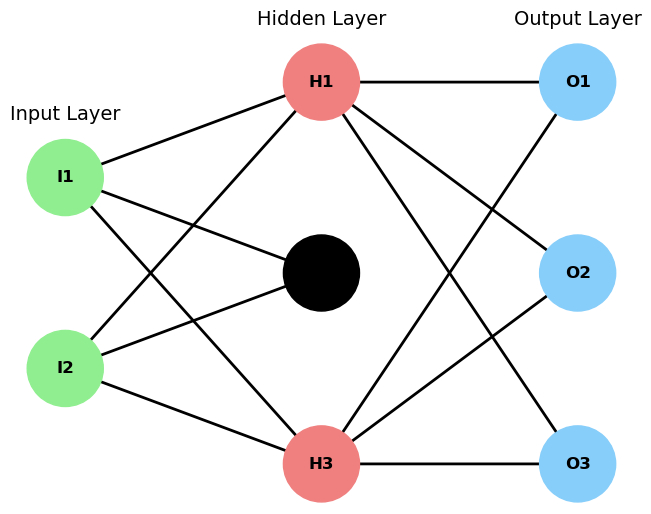

In [27]:
def plot_neural_network():
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Define the layers of the neural network
    input_layer = ['I1','I2']  # Input layer with 2 neurons
    hidden_layer = ['H1', 'H2', 'H3']  # Hidden layer with 3 neurons
    output_layer = ['O1','O2','O3']  # Output layer with 3 neurons

    # Add nodes to the graph for each layer
    G.add_nodes_from(input_layer)
    G.add_nodes_from(hidden_layer)
    G.add_nodes_from(output_layer)

    # Add edges between the layers
    # From input layer to hidden layer
    for i in input_layer:
        for h in hidden_layer:
            G.add_edge(i, h)

    G.add_edge('H1','O1')
    G.add_edge('H1','O2')
    G.add_edge('H1','O3')
    G.add_edge('H3','O1')
    G.add_edge('H3','O2')
    G.add_edge('H3','O3')

    # Define the positions of the nodes for visualizing the layers
    pos = {
        'I1': (0, 0.5), 'I2': (0,-0.5),  # Position for input neuron
        'H1': (1, 1), 'H2': (1, 0), 'H3': (1, -1),  # Hidden layer neurons
        'O1': (2, 1),'O2':(2,0), 'O3':(2,-1)  # Position for output neuron
    }

    # Define colors for each layer
    layer_colors = {
        'I1': 'lightgreen', 'I2': 'lightgreen', # Input layer color
        'H1': 'lightcoral', 'H2': 'black', 'H3': 'lightcoral',  # Hidden layer color
        'O1': 'lightskyblue', 'O2': 'lightskyblue', 'O3': 'lightskyblue'  # Output layer color
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))

    # Draw nodes with layer-specific colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=[layer_colors[node] for node in G.nodes])
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=10)
    
    # Draw labels (neuron names)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add labels for layers
    plt.text(0, 0.8, 'Input Layer', fontsize=14, ha='center')
    plt.text(1, 1.3, 'Hidden Layer', fontsize=14, ha='center')
    plt.text(2, 1.3, 'Output Layer', fontsize=14, ha='center')

    # Show the plot
    #plt.title('Vanilla Neural Network: Input -> Hidden -> Output', fontsize=16)
    plt.axis('off')  # Hide axes for clarity
    plt.show()

plot_neural_network()

We can initiate dropout in `Keras` with `model.add(Dropout())`. The `Dropout()` function takes as its argument the percentage of neurons that will randomly be zeroed out during each forward pass.

Let's revise our first model with dropout:

In [28]:
dropout_network = Sequential()
dropout_network.add(Dense(64, activation= "relu", input_shape=(28*28,)))
dropout_network.add(Dropout(0.5))
dropout_network.add(Dense(10, activation="softmax"))

/srv/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
dropout_network.compile(optimizer = 'rmsprop', 
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [30]:
history_dropout = dropout_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=20, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4490 - loss: 1.7157 - val_accuracy: 0.8200 - val_loss: 0.7589
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7659 - loss: 0.8378 - val_accuracy: 0.8700 - val_loss: 0.4889
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8121 - loss: 0.6502 - val_accuracy: 0.8870 - val_loss: 0.4173
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.5271 - val_accuracy: 0.8870 - val_loss: 0.3951
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8673 - loss: 0.4784 - val_accuracy: 0.9050 - val_loss: 0.3375
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8664 - loss: 0.4474 - val_accuracy: 0.8980 - val_loss: 0.3418
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8783 - loss: 0.4298 - val_accuracy: 0.9110 - val_loss: 0.3131
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.3854 - val_accuracy: 0.9140 - val_loss:

Let's map the accuracy of our dropout model:

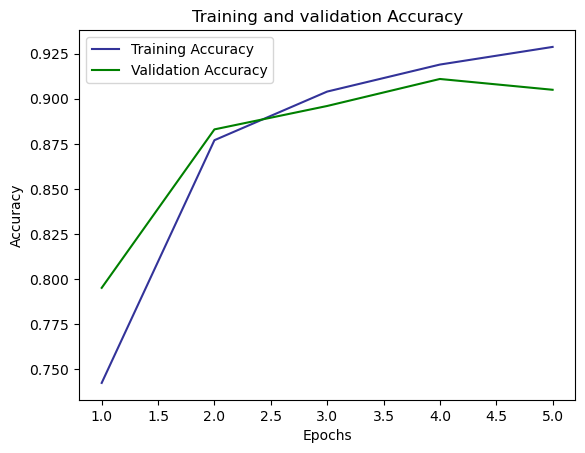

In [31]:
plot_epoch_accuracy(history.history)

🔔 **Question:**
* Did dropout improve the performance of our first model?

## 🥊 Challenge 3: Improving our model

We've now seen four different methods for improving model performance. 

1. Build and compile your own neural network using all of the improvement techniques we've discussed. Can you surpass your model performance from Challenge 2?
2. Visualize your model accuracy

<div class="alert alert-success">

## ❗ Key Points

* Neural networks add non-linearity to linear regression. This helps them solve problems without a linear relationship.
* A basic neural network is made up of an input layer, hidden layer(s), and an output layer. Hidden layers try to find patterns in the data.
* A model learns by changing the values of its layers' weights
* We can improve model performance by adding neurons to the hidden layer(s), adding more hidden layers, and implementing techniques like dropout.

</div>